# Etapa 2 - Análise exploratória de dados e tratamentos

Projeto de análise de dados da Síndrome gripal no ano de 2023, em todos os estados. O projeto foi proposto no #DataGlowUp 32 do Heitor Sasaki. Foram selecionadas as bibliotecas de selenium para automatizar a captura dos dados. Ao rodar o código, é possível pegar os dados mais recentes disponibilizados pelos dados abertos do SUS, entretando é importante ressaltar que o link muda conforme a atualização. 

Foram selecionados 1 estado de cada região, totalizando 5 estados analizados nesse documento.A escolha foi feita de forma aleatória e foram escolhido os estados para que a análise não ficasse tão pesada para rodar nesse documento. 

Após a etapa de engenharia de extração de dados, começo a analisar o formato e tamanho dos dados para poder juntar em um só dataframe e poder tratar os dados em conjunto. Através dessa análise, podemos perceber que todas as bases possuem a mesma quantidade de colunas (63 colunas) e o mesmo tipo das colunas.  

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np

In [3]:
#analisando cada base de dados 
df_am=pd.read_csv('dados-amazonas.csv', encoding='UTF-8', delimiter=";", on_bad_lines='skip',low_memory=False)
df_ce=pd.read_csv('dados-ceara.csv', encoding='UTF-8', delimiter=";", on_bad_lines='skip',low_memory=False)
df_df=pd.read_csv('dados-df.csv', encoding='UTF-8', delimiter=";", on_bad_lines='skip',low_memory=False)
df_mg=pd.read_csv('dados-mg.csv', encoding='UTF-8', delimiter=";", on_bad_lines='skip',low_memory=False)
df_pr=pd.read_csv('dados-parana.csv', encoding='UTF-8', delimiter=";", on_bad_lines='skip',low_memory=False)

In [13]:
#extraindo as principais infos sobre o df_am
df_am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207616 entries, 0 to 207615
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           207616 non-null  object 
 1   profissionalSaude                  207614 non-null  object 
 2   racaCor                            207588 non-null  object 
 3   outrosSintomas                     19128 non-null   object 
 4   outrasCondicoes                    6569 non-null    object 
 5   profissionalSeguranca              207494 non-null  object 
 6   cbo                                8108 non-null    object 
 7   condicoes                          29879 non-null   object 
 8   sexo                               207616 non-null  object 
 9   estado                             207616 non-null  object 
 10  estadoIBGE                         203959 non-null  object 
 11  municipio                          2076

In [15]:
#trazendo as primeiras 5 linhas do df_am
df_am.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Coriza, Distúrbios Gustativos, Tosse, Dispneia",Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-08-06,NaN,NaN,NaN,21.0
1,Assintomático,Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-11-24,NaN,NaN,NaN,NaN
2,"Coriza, Dor de Cabeça, Tosse, Dispneia",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-03-08,NaN,NaN,NaN,42.0
3,"Dor de Cabeça, Tosse, Febre, Dor de Garganta, ...",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-07-21,NaN,NaN,NaN,23.0
4,"Coriza, Dor de Cabeça, Tosse, Dor de Garganta,...",Não,Branca,NaN,NaN,Não,NaN,Imunossupressão,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-03-06,NaN,NaN,NaN,NaN


In [17]:
#extraindo as principais infos sobre o df_ce
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310204 entries, 0 to 310203
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           310203 non-null  object 
 1   profissionalSaude                  310203 non-null  object 
 2   racaCor                            310133 non-null  object 
 3   outrosSintomas                     37148 non-null   object 
 4   outrasCondicoes                    11957 non-null   object 
 5   profissionalSeguranca              309886 non-null  object 
 6   cbo                                14953 non-null   object 
 7   condicoes                          37132 non-null   object 
 8   sexo                               310204 non-null  object 
 9   estado                             310204 non-null  object 
 10  estadoIBGE                         306084 non-null  object 
 11  municipio                          3102

In [18]:
#trazendo as primeiras 5 linhas do df_ce
df_ce.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Tosse, Febre, Dor de Garganta, Coriza",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Ceará,...,NaN,NaN,NaN,NaN,NaN,2023-03-02,NaN,NaN,NaN,33.0
1,"Coriza, Tosse",Não,Parda,NaN,NaN,Não,NaN,Gestante,Masculino,Ceará,...,NaN,NaN,NaN,NaN,NaN,2022-11-25,NaN,NaN,NaN,33.0
2,"Febre, Dor de Garganta, Outros, Dor de Cabeça",Não,Parda,ASTENIA,NaN,Não,4101 - Supervisores administrativos,NaN,Feminino,Ceará,...,NaN,NaN,NaN,NaN,NaN,2023-02-16,NaN,NaN,NaN,41.0
3,"Dor de Cabeça, Tosse, Dor de Garganta, Coriza",Sim,Indigena,NaN,NaN,Não,352210 - Agente de Saúde Pública,NaN,Feminino,Ceará,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,NaN,NaN,NaN,45.0
4,"Coriza, Tosse",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Ceará,...,NaN,NaN,NaN,NaN,NaN,2022-07-01,NaN,NaN,NaN,46.0


In [19]:
#extraindo as principais infos sobre o df_df
df_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140242 entries, 0 to 140241
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           140242 non-null  object 
 1   profissionalSaude                  140241 non-null  object 
 2   racaCor                            140068 non-null  object 
 3   outrosSintomas                     33264 non-null   object 
 4   outrasCondicoes                    9053 non-null    object 
 5   profissionalSeguranca              140015 non-null  object 
 6   cbo                                5779 non-null    object 
 7   condicoes                          23013 non-null   object 
 8   sexo                               140242 non-null  object 
 9   estado                             140242 non-null  object 
 10  estadoIBGE                         137539 non-null  object 
 11  municipio                          1402

In [20]:
#trazendo as primeiras 5 linhas do df_df
df_df.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Coriza, Tosse, Dispneia, Dor de Garganta",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Distrito Federal,...,NaN,NaN,NaN,NaN,NaN,2023-03-06,NaN,NaN,NaN,17.0
1,Dor de Cabeça,Não,Parda,NaN,NaN,Não,5199 - Outros trabalhadores dos serviços,NaN,Masculino,Distrito Federal,...,NaN,NaN,NaN,NaN,NaN,2022-12-05,NaN,NaN,NaN,27.0
2,"Coriza, Dor de Cabeça, Tosse, Febre, Dor de Ga...",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Distrito Federal,...,NaN,NaN,NaN,NaN,NaN,2023-03-08,NaN,NaN,NaN,17.0
3,"Tosse, Febre",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,Goiás,...,NaN,NaN,NaN,NaN,NaN,2021-11-02,NaN,NaN,NaN,42.0
4,Febre,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Distrito Federal,...,NaN,NaN,NaN,NaN,NaN,2023-10-03,NaN,NaN,NaN,NaN


In [21]:
#extraindo as principais infos sobre o df_mg
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59102 entries, 0 to 59101
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sintomas                           59102 non-null  object 
 1   profissionalSaude                  56812 non-null  object 
 2   racaCor                            49792 non-null  object 
 3   outrosSintomas                     3638 non-null   object 
 4   outrasCondicoes                    560 non-null    object 
 5   profissionalSeguranca              56799 non-null  object 
 6   cbo                                796 non-null    object 
 7   condicoes                          7403 non-null   object 
 8   sexo                               59102 non-null  object 
 9   estado                             59102 non-null  object 
 10  estadoIBGE                         9440 non-null   object 
 11  municipio                          59102 non-null  obj

In [22]:
#trazendo as primeiras 5 linhas do df_mg
df_mg.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,Tosse,Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Minas Gerais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,"Coriza, Tosse, Febre, Dor de Garganta",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
2,"Coriza, Dor de Cabeça",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2023-03-10,NaN,NaN,NaN,44.0
3,"Coriza, Distúrbios Olfativos, Dor de Cabeça, T...",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Paraná,...,NaN,NaN,NaN,NaN,NaN,2023-11-10,2022-12-17,NaN,NaN,28.0
4,"Coriza, Outros",Sim,Branca,ASTENIA,NaN,Não,515105 - Agente Comunitário de Saúde,NaN,Masculino,Paraná,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0


In [23]:
#extraindo as principais infos sobre o df_pr
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399554 entries, 0 to 1399553
Data columns (total 64 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   sintomas                           1399533 non-null  object 
 1   profissionalSaude                  1399536 non-null  object 
 2   racaCor                            1399154 non-null  object 
 3   outrosSintomas                     491747 non-null   object 
 4   outrasCondicoes                    149260 non-null   object 
 5   profissionalSeguranca              1398651 non-null  object 
 6   cbo                                45626 non-null    object 
 7   condicoes                          244743 non-null   object 
 8   sexo                               1399554 non-null  object 
 9   estado                             1399554 non-null  object 
 10  estadoIBGE                         1378721 non-null  object 
 11  municipio               

In [4]:
# Lista dos dataframes
dataframes = [df_am, df_ce, df_df, df_mg, df_pr]

# Concatenando os dataframes
df_merged = pd.concat(dataframes)

# Resetando o índice
df_merged.reset_index(drop=True, inplace=True)

# Verificando o dataframe resultante
print(df_merged)

                                                  sintomas profissionalSaude  \
0           Coriza, Distúrbios Gustativos, Tosse, Dispneia               Não   
1                                            Assintomático               Não   
2                   Coriza, Dor de Cabeça, Tosse, Dispneia               Não   
3        Dor de Cabeça, Tosse, Febre, Dor de Garganta, ...               Não   
4        Coriza, Dor de Cabeça, Tosse, Dor de Garganta,...               Não   
...                                                    ...               ...   
2116713                                             Outros               Não   
2116714                               Febre, Dor de Cabeça               Não   
2116715                                              Febre               Não   
2116716  Coriza, Tosse, Febre, Dispneia, Dor de Gargant...               Não   
2116717                                      Assintomático               Não   

          racaCor outrosSintomas outras

In [25]:
#trazendo as infos do df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116718 entries, 0 to 2116717
Data columns (total 64 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   sintomas                           object 
 1   profissionalSaude                  object 
 2   racaCor                            object 
 3   outrosSintomas                     object 
 4   outrasCondicoes                    object 
 5   profissionalSeguranca              object 
 6   cbo                                object 
 7   condicoes                          object 
 8   sexo                               object 
 9   estado                             object 
 10  estadoIBGE                         object 
 11  municipio                          object 
 12  municipioIBGE                      object 
 13  origem                             object 
 14  estadoNotificacao                  object 
 15  municipioNotificacao               object 
 16  municipioNotificac

In [26]:
#trazendo as primeiras linhas do df_merged
df_merged.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Coriza, Distúrbios Gustativos, Tosse, Dispneia",Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-08-06,NaN,NaN,NaN,21.0
1,Assintomático,Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-11-24,NaN,NaN,NaN,NaN
2,"Coriza, Dor de Cabeça, Tosse, Dispneia",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-03-08,NaN,NaN,NaN,42.0
3,"Dor de Cabeça, Tosse, Febre, Dor de Garganta, ...",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2022-07-21,NaN,NaN,NaN,23.0
4,"Coriza, Dor de Cabeça, Tosse, Dor de Garganta,...",Não,Branca,NaN,NaN,Não,NaN,Imunossupressão,Feminino,Amazonas,...,NaN,NaN,NaN,NaN,NaN,2023-03-06,NaN,NaN,NaN,NaN


In [27]:
#trazendo as últimas linhas do df_merged
df_merged.tail()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
2116713,Outros,Não,Branca,NI,NI,Não,NaN,Outros,Feminino,Minas Gerais,...,NaN,NaN,NaN,NaN,NaN,2020-11-13,NaN,NaN,NaN,32.0
2116714,"Febre, Dor de Cabeça",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,Minas Gerais,...,NaN,NaN,NaN,NaN,NaN,2023-10-02,NaN,NaN,NaN,44.0
2116715,Febre,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Minas Gerais,...,NaN,NaN,NaN,NaN,NaN,2023-10-02,NaN,NaN,NaN,0.0
2116716,"Coriza, Tosse, Febre, Dispneia, Dor de Gargant...",Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,Minas Gerais,...,NaN,NaN,NaN,NaN,NaN,2021-12-28,NaN,NaN,NaN,52.0
2116717,Assintomático,Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Minas Gerais,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,NaN,NaN,NaN,47.0


# Tratamentos de dados
Alguns tratamentos foram feitos da base de dados(df_merged) como substituição dos campos nulos Nan para null, verificação de campos duplicados para, caso necessário, a exclusão dessas linhas e mudança do tipo da data para poder, após o tratamento, analisar a evolução dos casos. 

In [5]:
#ajustando os nulos da coluna de data para pode converter depois no formato correto 
df_merged['dataNotificacao'] = df_merged['dataNotificacao'].replace({np.nan: None})
df_merged['dataInicioSintomas'] = df_merged['dataInicioSintomas'].replace({np.nan: None})
df_merged['dataEncerramento'] = df_merged['dataEncerramento'].replace({np.nan: None})
df_merged['dataPrimeiraDose'] = df_merged['dataPrimeiraDose'].replace({np.nan: None})
df_merged['dataSegundaDose'] = df_merged['dataSegundaDose'].replace({np.nan: None})
df_merged['dataColetaTeste1'] = df_merged['dataColetaTeste1'].replace({np.nan: None})
df_merged['dataColetaTeste2'] = df_merged['dataColetaTeste2'].replace({np.nan: None})
df_merged['dataColetaTeste3'] = df_merged['dataColetaTeste3'].replace({np.nan: None})
df_merged['dataColetaTeste4'] = df_merged['dataColetaTeste4'].replace({np.nan: None})

In [7]:
#verificando campos duplicado
df_merged.duplicated().sum()

0

In [6]:
# Convertendo algumas colunas de datas que serão utilizadas na análise, que estão como object para formato de data 
df_merged['dataNotificacao'] = pd.to_datetime(df_merged['dataNotificacao'],format='%Y-%m-%d')
df_merged['dataInicioSintomas'] = pd.to_datetime(df_merged['dataInicioSintomas'],format='%Y-%m-%d')
df_merged['dataEncerramento'] = pd.to_datetime(df_merged['dataEncerramento'],format='%Y-%m-%d')
df_merged['dataColetaTeste1'] = pd.to_datetime(df_merged['dataColetaTeste1'],format='%Y-%m-%d')

In [9]:
#verificando se a conversão deu certo 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116718 entries, 0 to 2116717
Data columns (total 64 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   sintomas                           object        
 1   profissionalSaude                  object        
 2   racaCor                            object        
 3   outrosSintomas                     object        
 4   outrasCondicoes                    object        
 5   profissionalSeguranca              object        
 6   cbo                                object        
 7   condicoes                          object        
 8   sexo                               object        
 9   estado                             object        
 10  estadoIBGE                         object        
 11  municipio                          object        
 12  municipioIBGE                      object        
 13  origem                             object        
 14  es

In [7]:
#tratamento da coluna de Estado notificado
df_merged['estadoNotificacao'].value_counts()

# Lista de valores que não estão conforme
valores_para_remover = ['5300108', 'Bahia', '3106200', '3170206']

# Remover linhas com os valores especificados
df_merged = df_merged[~df_merged['estadoNotificacao'].isin(valores_para_remover)]

# Verificar o resultado
print(df_merged['estadoNotificacao'].value_counts())

estadoNotificacao
Minas Gerais        1399551
Ceará                310204
Amazonas             207616
Distrito Federal     140241
Paraná                59102
Name: count, dtype: int64


# Plotagem para análise dos dados
Foi utilizado a biblioteca matplot para realizar uma primeira análise dos dados, que será feita em um segundo momento no Power BI. Essa primeira análise é importante para entender se possui algum outlyier nos dados para que seja feito o tratamento, caso necessário, desses dados.

In [1]:
#importando as bibliotecas para análise
import pandas as pd
import matplotlib.pyplot as plt

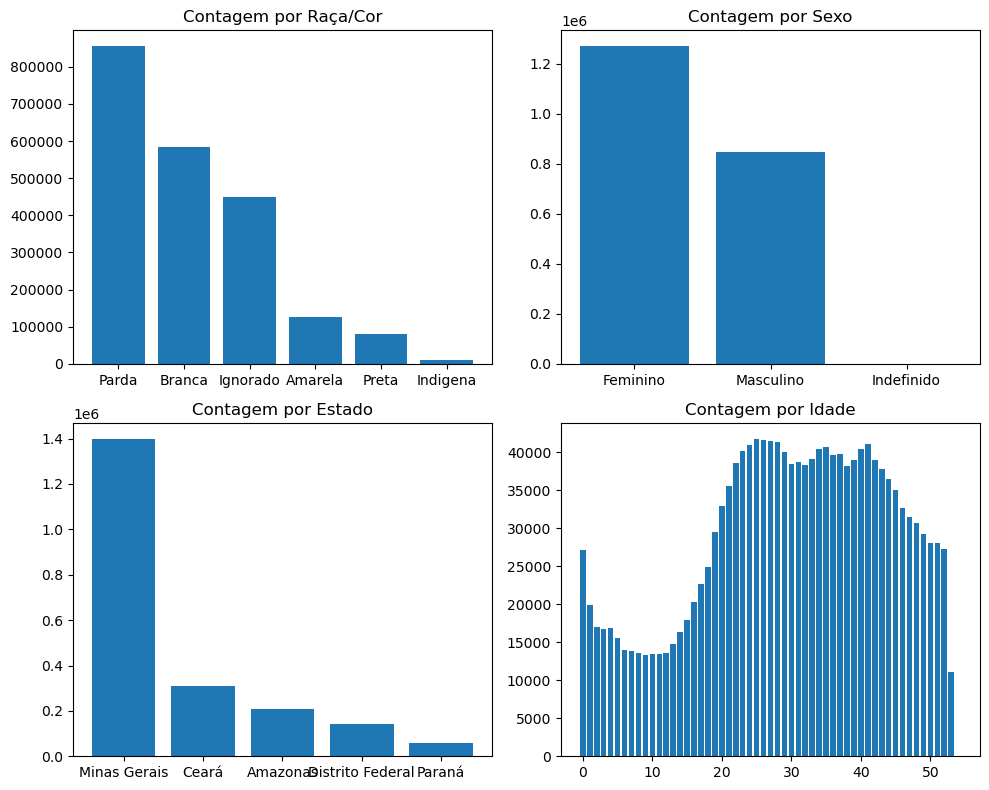

In [20]:
# Criar o gráfico de barras
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 linhas, 2 colunas

# Contagem por raça/cor
axs[0, 0].bar(df_merged['racaCor'].value_counts().index, df_merged['racaCor'].value_counts().values)
axs[0, 0].set_title('Contagem por Raça/Cor')

# Contagem por sexo
axs[0, 1].bar(df_merged['sexo'].value_counts().index, df_merged['sexo'].value_counts().values)
axs[0, 1].set_title('Contagem por Sexo')

# Contagem por estado
axs[1, 0].bar(df_merged['estadoNotificacao'].value_counts().index, df_merged['estadoNotificacao'].value_counts().values)
axs[1, 0].set_title('Contagem por Estado')

# Contagem por idade (apenas uma representação simples, considerando cada idade como uma categoria)
axs[1, 1].bar(df_merged['idade'].value_counts().index, df_merged['idade'].value_counts().values)
axs[1, 1].set_title('Contagem por Idade')

plt.tight_layout()
plt.show()

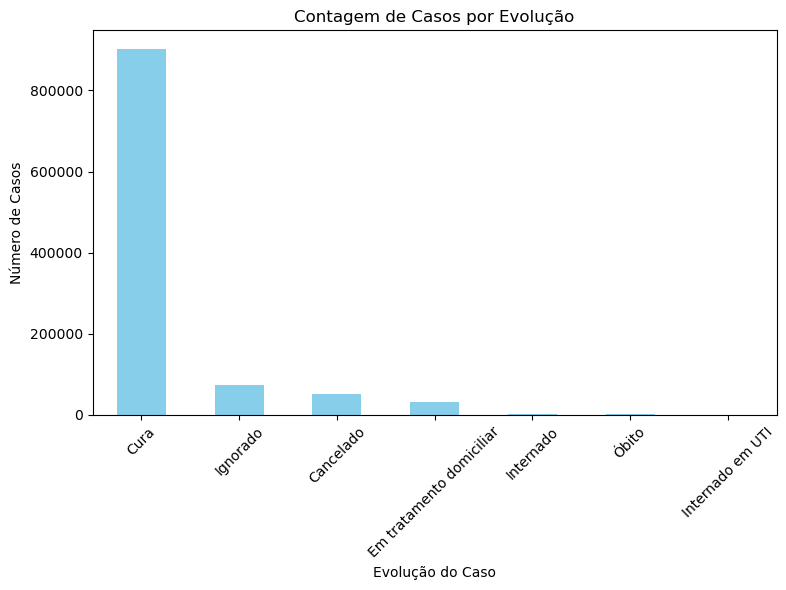

In [21]:
# Contagem de casos por categoria na coluna 'evolucaoCaso'
contagem_evolucao = df_merged['evolucaoCaso'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
contagem_evolucao.plot(kind='bar', color='skyblue')
plt.title('Contagem de Casos por Evolução')
plt.xlabel('Evolução do Caso')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

C:\Users\Computador\AppData\Local\Temp\ipykernel_15908\2472371976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtrado['ano'] = df_merged_filtrado['dataNotificacao'].dt.year


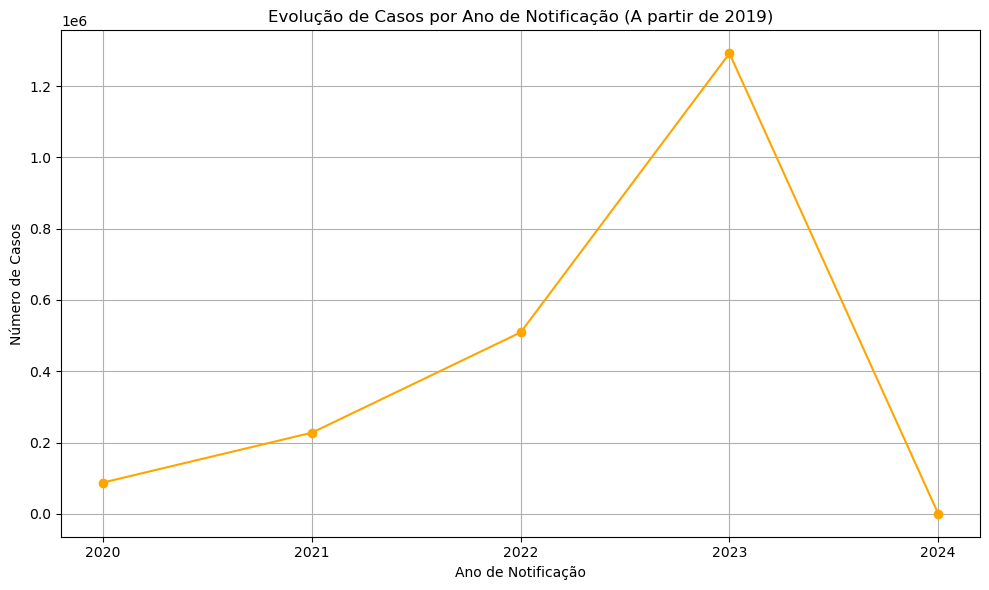

In [26]:
# Filtrar os dados para incluir apenas as datas a partir de 2019
df_merged_filtrado = df_merged[df_merged['dataNotificacao'].dt.year >= 2019]

# Extrair o ano da coluna 'dataNotificacao'
df_merged_filtrado['ano'] = df_merged_filtrado['dataNotificacao'].dt.year

# Agrupar os dados filtrados por ano e contar o número de casos em cada ano
evolucao_por_ano = df_merged_filtrado.groupby('ano').size()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
evolucao_por_ano.plot(kind='line', marker='o', color='orange')
plt.title('Evolução de Casos por Ano de Notificação (A partir de 2019)')
plt.xlabel('Ano de Notificação')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.xticks(evolucao_por_ano.index.astype(int))  # Convertendo os anos para inteiros no eixo x
plt.tight_layout()
plt.show()

In [27]:
df_merged['dataNotificacao'].value_counts()

dataNotificacao
2023-01-03    13133
2023-01-02    13059
2023-01-04    12225
2023-01-05    11431
2023-01-09    11108
              ...  
2024-02-13        1
2020-01-13        1
2020-02-16        1
2020-03-06        1
2020-03-12        1
Name: count, Length: 1478, dtype: int64

In [8]:
#exportando para csv

# Especifique o caminho do arquivo CSV onde você deseja salvar o DataFrame
caminho_arquivo_csv = 'df_merged_saude.csv'

# Exportar DataFrame para CSV
df_merged.to_csv(caminho_arquivo_csv, index=False)